In [12]:
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import threading
import time
from matplotlib import cm

x1= np.random.normal(3, 2, 1000000)
x2= np.random.normal(-1, 2, 1000000)
e= np.random.normal(0, np.sqrt(2), 1000000)
Y1= 3+ x1+ 2*x2+ e
Y = Y1.reshape(Y1.shape[0],1)


def cost(X1, theta1, Y1):
    return np.sum((np.dot(X1, theta1) - Y1) ** 2) /(2* len(Y1))


def grad_cost(X,theta, Y):
    temp = Y-np.dot(X,theta)
    temp2= temp * -X
    theta = (temp2.sum(axis=0))/(len(Y))
    return theta.T.reshape((theta.T.shape[0], 1))
print("done")

done


In [22]:
X_temp = np.append(np.ones((1000000,1)), x1.reshape(1000000,1) ,axis=1)
X =np.append(X_temp, x2.reshape(1000000,1), axis=1)

# theta= np.ones((3,1))
thetas= [0,0,0]


def sto_gradient(r, diff, steps, avg_no):
    total_itr=flag =0
    avg_th=[]
    theta = np.zeros((3, 1))
    prev_cost = cost(X[:r,:], theta, Y[:r,:])
    for  j in range(steps):
        for i in range(0,1000000,r):
            total_itr =total_itr+1
            if(total_itr%100000==0) :
                print('1000 steps')
            X_batch = X[i:r+i,:] 
            Y_batch= Y[i:r+i,:]
            gcost=grad_cost(X_batch, theta, Y_batch)
            theta = theta - 0.001 * gcost
            if i%(r*10)==0 :
                thetas.append(theta[0][0])
                thetas.append(theta[1][0])
                thetas.append(theta[2][0])
            curr_cost=  cost(X_batch, theta, Y_batch)
            avg_th.append(curr_cost)
            if(total_itr % avg_no == 0):
                cost_diff = prev_cost-np.mean(avg_th)
                avg_th =[]
                prev_cost = np.mean(avg_th)
                if abs(round(cost_diff,6)) <= diff and total_itr > 1000000/r:
                    flag=1
                    print(prev_cost, curr_cost)
                    break
        if flag==1:
            break;
    return theta ,total_itr

print(cost(X,theta, Y))
start_time =time.time()

# res, itr = sto_gradient(1000000,0.0,10000, 1)
# res, itr = sto_gradient(100,0.000009,80)
# res, itr = sto_gradient(1000,0.0,50)
res, itr = sto_gradient(1,0.00009,1,1000)


print('time',time.time()-start_time)
print(itr)
        
print(res)   
print(cost(X,res, Y))


3.5001934414536704
1000 steps
1000 steps
1000 steps
1000 steps
1000 steps
1000 steps
1000 steps
1000 steps
1000 steps
1000 steps
time 60.58537244796753
1000000
[[3.01064434]
 [1.00094338]
 [2.02323163]]
1.004008262096353


(6,)
(6,)


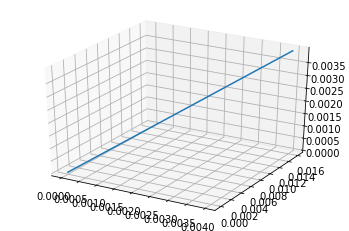

In [3]:
fig = plt.figure(0)

ax = plt.axes(projection='3d')
# ax.plot_surface(theta0, theta1, theta2,cmap=cm.coolwarm,linewidth=0,antialiased=False, alpha=0.6)

thetas=np.array(thetas)
print(thetas.shape)
temp = thetas.shape[0]%3
# thetas1 = thetas[:-temp,:]
print(thetas.shape)
thetas = thetas.reshape(int(thetas.shape[0]/3), 3)

th0=[thetas[i][0] for i in range(thetas.shape[0])]
# print(th0.shape)
th1=[thetas[i][1] for i in range(thetas.shape[0])]
th2=[thetas[i][2] for i in range(thetas.shape[0])]
ax.plot(th0, th1, th2)






In [4]:
batch size 100 steps 80
e  =0.000009

batch size 

e==0
st

3.508833444386378
33.04083490371704
[[2.99901936]
 [1.0013513 ]
 [1.99859587]]
1.0027394874533802

batch 1000


b size 1000000 steps 1000

63.79644060134888
[[0.00399946]
 [0.01599454]
 [0.00403449]]

b size 1000000 steps 100
6.441242456436157
[[0.00400228]
 [0.01599572]
 [0.00399677

SyntaxError: invalid syntax (<ipython-input-4-22d9f0e71cea>, line 1)